## 遗传算法与NN

### 结构一

Generation 500/8000, Best Fitness: -0.9044
Generation 1000/8000, Best Fitness: -0.2292
Generation 1500/8000, Best Fitness: -0.0139
Optimized Weights for Structure 1: [ -80.44264928 -169.98329922  175.254987    -80.56385057   87.80204574
  -88.40381986   89.45282139  -86.9592246    88.1831243 ]
Input: [-1 -1], Predicted Output: 0.0145, Target: 0
Input: [-1  1], Predicted Output: 0.9849, Target: 1
Input: [ 1 -1], Predicted Output: 0.9812, Target: 1
Input: [1 1], Predicted Output: 0.0145, Target: 0


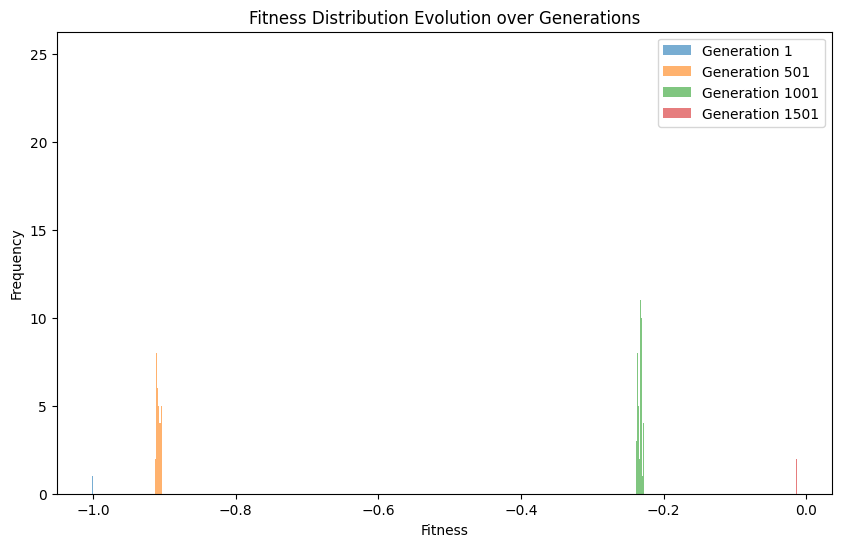

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define XOR problem inputs and outputs, replace 0 with -1
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
inputs[inputs == 0] = -1  # Replace all 0s with -1
targets = np.array([0, 1, 1, 0])  # XOR target outputs

# Define genetic algorithm parameters
population_size = 50  # Population size
max_generations = 8000  # Maximum generations
mutation_rate = 0.1  # Mutation rate
crossover_rate = 0.7  # Crossover rate

# Define the number of weights for network structure 1
num_weights_structure_1 = 9  # w10, w12, w13, w20, w30, w24, w25, w34, w35

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x/20))

# Forward propagation for structure 1
def forward_propagation_structure_1(weights, x):
    w10, w12, w13, w20, w30, w24, w25, w34, w35 = weights

    # Input layer to hidden layer
    h2 = sigmoid(w20 * -1 + w24 * x[0] + w25 * x[1])  # Node 2
    h3 = sigmoid(w30 * -1 + w34 * x[0] + w35 * x[1])  # Node 3

    # Hidden layer to output layer
    output = sigmoid(w10 * -1 + w12 * h2 + w13 * h3)
    return output

# Fitness evaluation function
def evaluate_fitness_structure_1(weights):
    total_error = 0
    for i in range(len(inputs)):
        predicted = forward_propagation_structure_1(weights, inputs[i])
        total_error += (predicted - targets[i]) ** 2  # Mean squared error
    return -total_error  # Fitness is the negative of the error

# Initialize population
def initialize_population(size, num_weights):
    return np.random.uniform(-1, 1, (size, num_weights))

# Parent selection: Roulette wheel selection
def select_parents(population, fitnesses):
    probabilities = fitnesses - fitnesses.min()  # Avoid negative values
    probabilities /= probabilities.sum()
    indices = np.random.choice(len(population), size=2, p=probabilities)
    return population[indices[0]], population[indices[1]]

# Crossover operation: Single-point crossover
def crossover(parent1, parent2):
    if np.random.rand() > crossover_rate:
        return parent1, parent2  # No crossover, return parents directly
    point = np.random.randint(1, len(parent1))
    child1 = np.concatenate((parent1[:point], parent2[point:]))
    child2 = np.concatenate((parent2[:point], parent1[point:]))
    return child1, child2

# Mutation operation
def mutate(weights):
    for i in range(len(weights)):
        if np.random.rand() < mutation_rate:
            weights[i] += np.random.normal(0, 0.5)  # Small random mutation
    return weights

# Main genetic algorithm function
def genetic_algorithm_structure_1():
    # Initialize population
    population = initialize_population(population_size, num_weights_structure_1)
    
    # Store fitness progression for each generation
    fitness_progression = []
    
    for generation in range(max_generations):
        fitnesses = np.array([evaluate_fitness_structure_1(ind) for ind in population])
        
        # Record fitness distribution for the current generation
        fitness_progression.append(fitnesses)
        
        # Print the best fitness every 500 generations
        if (generation + 1) % 500 == 0:
            best_fitness = fitnesses.max()
            print(f"Generation {generation + 1}/{max_generations}, Best Fitness: {best_fitness:.4f}")
        
        # Stop early if the fitness is close to zero
        best_fitness = fitnesses.max()
        if best_fitness > -0.001:
            break

        # Select parents, perform crossover, and mutation to generate new population
        new_population = []
        while len(new_population) < population_size:
            parent1, parent2 = select_parents(population, fitnesses)
            child1, child2 = crossover(parent1, parent2)
            new_population.append(mutate(child1))
            new_population.append(mutate(child2))
        population = np.array(new_population[:population_size])

    # Return the best weights and fitness progression
    best_index = fitnesses.argmax()
    return population[best_index], fitness_progression

# Run genetic algorithm to optimize network structure 1
best_weights_structure_1, fitness_progression = genetic_algorithm_structure_1()

# Print optimized weights
print("Optimized Weights for Structure 1:", best_weights_structure_1)
for i in range(len(inputs)):
    output = forward_propagation_structure_1(best_weights_structure_1, inputs[i])
    print(f"Input: {inputs[i]}, Predicted Output: {output:.4f}, Target: {targets[i]}")

# Plot the evolution of fitness distribution
fitness_progression = np.array(fitness_progression)
plt.figure(figsize=(10, 6))

# Plot fitness distribution evolution, avoiding out-of-bounds error
max_generations_to_plot = len(fitness_progression)
for i in range(0, max_generations_to_plot, 500):  # Plot fitness distribution every 500 generations
    plt.hist(fitness_progression[i], bins=10, alpha=0.6, label=f'Generation {i+1}')

plt.title("Fitness Distribution Evolution over Generations")
plt.xlabel("Fitness")
plt.ylabel("Frequency")
plt.legend()
plt.show()


### 不同变异率和交叉率对收敛次数影响

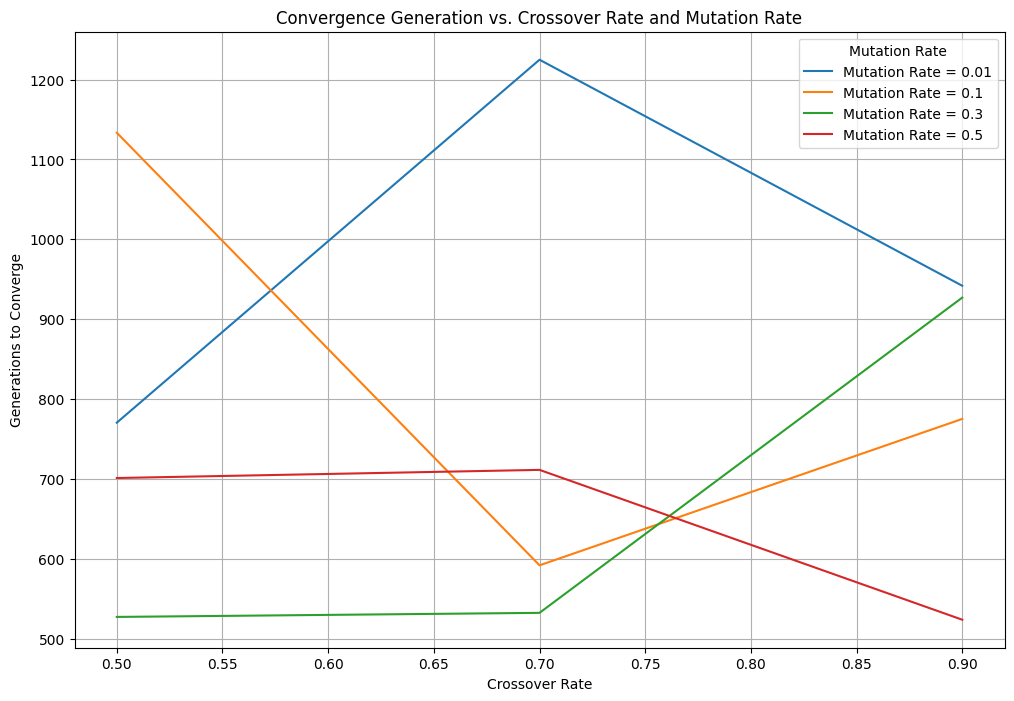

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define XOR problem inputs and outputs, replace 0 with -1
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
X[X == 0] = -1  # Replace all 0 with -1
Y = np.array([0, 1, 1, 0])  # XOR target outputs

# Define the number of weights for network structure 1
NUM_WEIGHTS_STRUCTURE_1 = 9  # w10, w12, w13, w20, w30, w24, w25, w34, w35

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Forward propagation for structure 1
def forward_propagation_structure_1(weights, x):
    w10, w12, w13, w20, w30, w24, w25, w34, w35 = weights

    # Input to hidden layer
    h2 = sigmoid(w20 * -1 + w24 * x[0] + w25 * x[1])  # Node 2
    h3 = sigmoid(w30 * -1 + w34 * x[0] + w35 * x[1])  # Node 3

    # Hidden layer to output layer
    y = sigmoid(w10 * -1 + w12 * h2 + w13 * h3)
    return y

# Fitness evaluation function
def evaluate_fitness_structure_1(weights):
    total_error = 0
    for i in range(len(X)):
        predicted = forward_propagation_structure_1(weights, X[i])
        total_error += (predicted - Y[i]) ** 2  # Mean Squared Error
    return -total_error  # Fitness is the negative error

# Initialize population
def initialize_population(size, num_weights):
    return np.random.uniform(-1, 1, (size, num_weights))

# Selection operation: Roulette Wheel Selection
def select_parents(population, fitnesses):
    probabilities = fitnesses - fitnesses.min()  # Avoid negative values
    probabilities /= probabilities.sum()
    indices = np.random.choice(len(population), size=2, p=probabilities)
    return population[indices[0]], population[indices[1]]

# Crossover operation: Single-point crossover
def crossover(parent1, parent2, crossover_rate):
    if np.random.rand() > crossover_rate:
        return parent1, parent2  # No crossover, return parents as is
    point = np.random.randint(1, len(parent1))
    child1 = np.concatenate((parent1[:point], parent2[point:]))
    child2 = np.concatenate((parent2[:point], parent1[point:]))
    return child1, child2

# Mutation operation
def mutate(weights, mutation_rate):
    for i in range(len(weights)):
        if np.random.rand() < mutation_rate:
            weights[i] += np.random.normal(0, 0.3)  # Small random mutation
    return weights

# Main Genetic Algorithm Process
def genetic_algorithm_structure_1(mutation_rate, crossover_rate):
    # Initialize population
    population = initialize_population(POP_SIZE, NUM_WEIGHTS_STRUCTURE_1)
    
    # Track the generation where convergence occurs
    generations_to_converge = None
    
    for generation in range(GENS):
        fitnesses = np.array([evaluate_fitness_structure_1(ind) for ind in population])
        
        # If fitness threshold is met, stop early
        best_fitness = fitnesses.max()
        if best_fitness > -0.01:
            generations_to_converge = generation + 1
            break

        # Selection, crossover, mutation to generate new population
        new_population = []
        while len(new_population) < POP_SIZE:
            parent1, parent2 = select_parents(population, fitnesses)
            child1, child2 = crossover(parent1, parent2, crossover_rate)
            new_population.append(mutate(child1, mutation_rate))
            new_population.append(mutate(child2, mutation_rate))
        population = np.array(new_population[:POP_SIZE])

    return generations_to_converge

# Genetic Algorithm Parameters
POP_SIZE = 50  # Population size
GENS = 2000  # Maximum generations

# Different mutation and crossover rates to test
mutation_rates = [0.01, 0.1, 0.3, 0.5]
crossover_rates = [0.5, 0.7, 0.9]

# Store the convergence data for different configurations
convergence_data = []

# Run experiments for each combination of mutation and crossover rates
for mutation_rate in mutation_rates:
    for crossover_rate in crossover_rates:
        results = []
        for _ in range(10):  # Run 10 times and average the results
            generations = genetic_algorithm_structure_1(mutation_rate, crossover_rate)
            if generations is None:
                generations = GENS  # If no convergence, use max generations
            results.append(generations)
        
        # Record average generations to converge for each configuration
        avg_generations = np.mean(results)
        convergence_data.append((mutation_rate, crossover_rate, avg_generations))

# Convert convergence data to NumPy array for plotting
convergence_data = np.array(convergence_data)

# Plot the results
plt.figure(figsize=(12, 8))
for i, mutation_rate in enumerate(mutation_rates):
    plt.plot(crossover_rates, convergence_data[i*len(crossover_rates):(i+1)*len(crossover_rates), 2], label=f'Mutation Rate = {mutation_rate}')
    
plt.title('Convergence Generation vs. Crossover Rate and Mutation Rate')
plt.xlabel('Crossover Rate')
plt.ylabel('Generations to Converge')
plt.legend(title="Mutation Rate")
plt.grid(True)
plt.show()


### 结构二

Generation 500/8000, Best Fitness: -0.4532
Generation 1000/8000, Best Fitness: -0.0519
Generation 1500/8000, Best Fitness: -0.0046
Optimized Weights: [ 61.85314396 -33.54908962  83.22081432  20.61155163  20.6708063
 -33.79853142 -32.28386383]
Input: [-1 -1], Predicted Output: 0.0183, Target: 0
Input: [-1  1], Predicted Output: 0.9862, Target: 1
Input: [ 1 -1], Predicted Output: 0.9857, Target: 1
Input: [1 1], Predicted Output: 0.0165, Target: 0


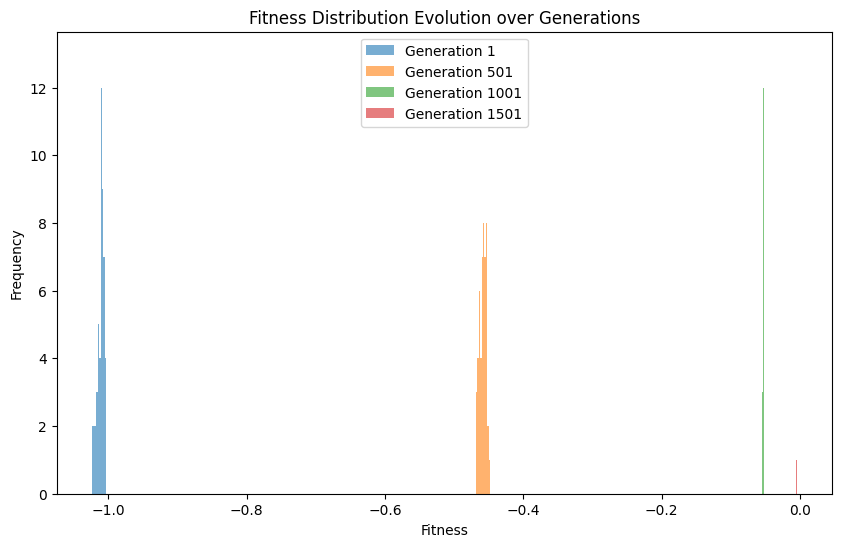

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define XOR problem inputs and outputs, replace 0 with -1
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
X[X == 0] = -1  # Replace 0 with -1
Y = np.array([0, 1, 1, 0])  # XOR target output

# Define genetic algorithm parameters
POP_SIZE = 50  # Population size
GENS = 8000  # Maximum generations
MUTATION_RATE = 0.5  # Mutation rate
CROSSOVER_RATE = 0.7  # Crossover rate

# Define the number of weights in network structure
NUM_WEIGHTS = 7  # w10, w20, w12, w13, w14, w23, w24

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x / 5))

# Forward propagation - Structure 1
def forward_propagation(weights, x):
    w10, w20, w12, w13, w14, w23, w24 = weights

    # Input layer to hidden layer
    h2 = sigmoid(w20 * -1 + w23 * x[0] + w24 * x[1])  # Node 2

    # Hidden layer to output layer
    y = sigmoid(w10 * -1 + w12 * h2 + w13 * x[0] + w14 * x[1])
    return y

# Fitness evaluation function
def evaluate_fitness(weights):
    total_error = 0
    for i in range(len(X)):
        predicted = forward_propagation(weights, X[i])
        total_error += (predicted - Y[i]) ** 2  # Mean squared error
    return -total_error  # Fitness is the negative of error

# Initialize population
def initialize_population(size, num_weights):
    return np.random.uniform(-1, 1, (size, num_weights))

# Parent selection: roulette wheel selection
def select_parents(population, fitnesses):
    probabilities = fitnesses - fitnesses.min()  # Avoid negative values
    probabilities /= probabilities.sum()
    indices = np.random.choice(len(population), size=2, p=probabilities)
    return population[indices[0]], population[indices[1]]

# Crossover: single-point crossover
def crossover(parent1, parent2):
    if np.random.rand() > CROSSOVER_RATE:
        return parent1, parent2  # No crossover
    point = np.random.randint(1, len(parent1))
    child1 = np.concatenate((parent1[:point], parent2[point:]))
    child2 = np.concatenate((parent2[:point], parent1[point:]))
    return child1, child2

# Mutation operation
def mutate(weights):
    for i in range(len(weights)):
        if np.random.rand() < MUTATION_RATE:
            weights[i] += np.random.normal(0, 0.1)  # Small random change
    return weights

# Main genetic algorithm
def genetic_algorithm():
    # Initialize population
    population = initialize_population(POP_SIZE, NUM_WEIGHTS)
    
    # Track fitness progression
    fitness_progression = []

    for generation in range(GENS):
        fitnesses = np.array([evaluate_fitness(ind) for ind in population])
        
        # Record fitness for this generation
        fitness_progression.append(fitnesses)

        # Print the best fitness every 500 generations
        if (generation + 1) % 500 == 0:
            best_fitness = fitnesses.max()
            print(f"Generation {generation + 1}/{GENS}, Best Fitness: {best_fitness:.4f}")
        
        # Terminate early if fitness is close to zero
        best_fitness = fitnesses.max()
        if best_fitness > -0.001:
            break

        # Generate new population via selection, crossover, mutation
        new_population = []
        while len(new_population) < POP_SIZE:
            parent1, parent2 = select_parents(population, fitnesses)
            child1, child2 = crossover(parent1, parent2)
            new_population.append(mutate(child1))
            new_population.append(mutate(child2))
        population = np.array(new_population[:POP_SIZE])

    # Return the best weights and fitness history
    best_index = fitnesses.argmax()
    return population[best_index], fitness_progression

# Run genetic algorithm for optimization
best_weights, fitness_progression = genetic_algorithm()

# Output the best weights and their corresponding output for each input
print("Optimized Weights:", best_weights)
for i in range(len(X)):
    output = forward_propagation(best_weights, X[i])
    print(f"Input: {X[i]}, Predicted Output: {output:.4f}, Target: {Y[i]}")

# Plot fitness distribution evolution
fitness_progression = np.array(fitness_progression)
plt.figure(figsize=(10, 6))

# Plot fitness distribution every 500 generations
for i in range(0, len(fitness_progression), 500):
    plt.hist(fitness_progression[i], bins=10, alpha=0.6, label=f'Generation {i + 1}')

plt.title("Fitness Distribution Evolution over Generations")
plt.xlabel("Fitness")
plt.ylabel("Frequency")
plt.legend()
plt.show()


遗传算法（GA）：  
优点：具有较强的全局优化能力，不容易陷入局部最优解。  
缺点：收敛速度较慢，训练时间较长。

反向传播算法（BP）：  
优点：训练速度较快，收敛速度较快，适用于大多数问题。  
缺点：在某些情况下可能陷入局部最优解，特别是在深度神经网络中。